# Project: online retail trasnational dataset to build a RFM clustering

## - Tabel of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model building">Model building</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

## Overview
Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We will be using the online retail trasnational dataset to build a RFM clustering and choose the best set of customers which the company should target.

## Variables
- InvoiceNo	
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from datetime import date, datetime

# Data Wrangling

## General properties
- exploring data, looking for null values, deplicated values, cheking the values in each column
- checking data types
- checking summary statistics

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.duplicated().sum()

5268

In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning
- droping null values, duplicates
- calculating the time since the last purchase from the InvoiceDate column
- calculating frequency for each customer and assign it to a new column
- calculating new column for sales (sales = quantity * unitprice)

In [9]:
# dealing with null values
df = df.dropna()
df.shape

(406829, 8)

In [10]:
#droping duplicated columns
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
#converting column type to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")

In [12]:
max_date = max(df['InvoiceDate'])
df['date_diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00


In [13]:
#compute the last transaction to compute the recency of customer
new_df = df.groupby('CustomerID')['date_diff'].min()
new_df = new_df.reset_index()
new_df.head()

,CustomerID,date_diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [14]:
new_df['date_diff'] = new_df['date_diff'].dt.days
new_df.head()

,CustomerID,date_diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [15]:
df['sales'] = df['Quantity'] * df['UnitPrice']
new_sales = df.groupby('CustomerID')['sales'].sum()
new_sales = new_sales.reset_index()
new_sales.head()

,CustomerID,sales
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [16]:
new_df = pd.merge(new_df, new_sales, how = 'inner', on= 'CustomerID')
new_df.head()

,CustomerID,date_diff,sales
0,12346.0,325,0.00
1,12347.0,1,4310.00
2,12348.0,74,1797.24
3,12349.0,18,1757.55
4,12350.0,309,334.40


In [17]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [18]:
new_df = pd.merge(new_df, frequency, on = 'CustomerID', how = 'inner')
new_df.head()

,CustomerID,date_diff,sales,InvoiceNo
0,12346.0,325,0.00,2
1,12347.0,1,4310.00,182
2,12348.0,74,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,309,334.40,17


In [19]:
new_df = new_df.rename(columns = {'date_diff': 'recency', 'InvoiceNo':'frequency'})
new_df.head()

,CustomerID,recency,sales,frequency
0,12346.0,325,0.00,2
1,12347.0,1,4310.00,182
2,12348.0,74,1797.24,31
3,12349.0,18,1757.55,73
4,12350.0,309,334.40,17


## Exploratory Data Analysis

In [20]:
new_df.describe()

,CustomerID,recency,sales,frequency
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,1893.531433,91.858188
std,1722.390705,100.765435,8218.696204,229.223566
min,12346.000000,0.000000,-4287.630000,1.000000
25%,13812.750000,16.000000,291.795000,17.000000
50%,15300.500000,49.000000,644.070000,41.000000
75%,16778.250000,142.000000,1608.335000,99.250000
max,18287.000000,373.000000,279489.020000,7812.000000


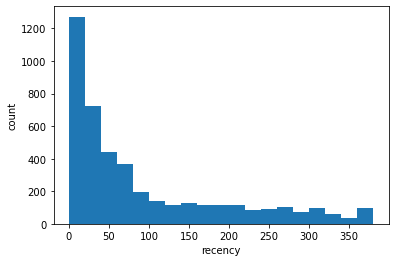

In [21]:
bins = np.arange(0, new_df['recency'].max()+20, 20)
plt.hist(new_df['recency'], bins= bins)
plt.xlabel('recency')
plt.ylabel('count');

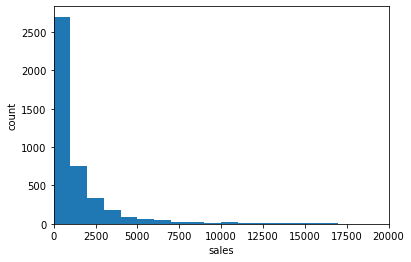

In [22]:
bins = np.arange(0, new_df['sales'].max()+1000, 1000)
plt.hist(new_df['sales'], bins = bins)
plt.xlabel('sales')
plt.ylabel('count')
plt.xlim((0, 20000));

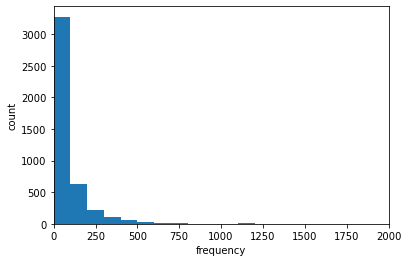

In [23]:
bins = np.arange(0, new_df['frequency'].max() + 100, 100)
plt.hist(new_df['frequency'], bins= bins)
plt.xlabel('frequency')
plt.ylabel('count')
plt.xlim((0, 2000));

it seems that the dataset have outliers, these outliers may be statistical and may be domain specific

In [24]:
#removing statistical outliers from the sales 
Q1 = new_df.sales.quantile(0.05) 
Q3 = new_df.sales.quantile(0.95)
IQR = Q3 - Q1
new_df = new_df[(new_df.sales >= (Q1 - 1.5 * IQR)) & (new_df.sales <= (Q3 + 1.5 * IQR))]
                 
# removing statistical outliers from the frequency
Q1 = new_df.frequency.quantile(0.05) 
Q3 = new_df.frequency.quantile(0.95)
IQR = Q3 - Q1
new_df = new_df[(new_df.frequency >= (Q1 - 1.5 * IQR)) & (new_df.frequency <= (Q3 + 1.5 * IQR))]

# removing statistical outliers from the recency
Q1 = new_df.recency.quantile(0.05) 
Q3 = new_df.recency.quantile(0.95)
IQR = Q3 - Q1
new_df = new_df[(new_df.recency >= (Q1 - 1.5 * IQR)) & (new_df.recency <= (Q3 + 1.5 * IQR))]

### Features scalling

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
x = new_df[['recency', 'sales', 'frequency']]
x_scalled = scaler.fit_transform(x)
type(x_scalled)

numpy.ndarray

In [27]:
x_scalled = pd.DataFrame(x_scalled)
x_scalled.head()

,0,1,2
0,2.302166,-0.722542,-0.750830
1,-0.906150,1.735232,1.057112
2,-0.183289,0.302333,-0.459551
3,-0.737813,0.279700,-0.037698
4,2.143731,-0.531850,-0.600168


In [28]:
x_scalled.columns = ['recency', 'sales', 'frequency']
x_scalled.head()

,recency,sales,frequency
0,2.302166,-0.722542,-0.750830
1,-0.906150,1.735232,1.057112
2,-0.183289,0.302333,-0.459551
3,-0.737813,0.279700,-0.037698
4,2.143731,-0.531850,-0.600168


# Model building
## 1- using K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

### How the K-means algorithm works
 - Initialize cluster centers.
 - Assign observations to the closest cluster center.
 - Revise cluster centers as mean of assigned observations.
 - Repeat step 2 and step 3 until convergence.

### Using the elbow method to find the optimal number of clusters

In [29]:
from sklearn.cluster import KMeans

In [30]:
x = x_scalled.values
type(x_scalled)

pandas.core.frame.DataFrame

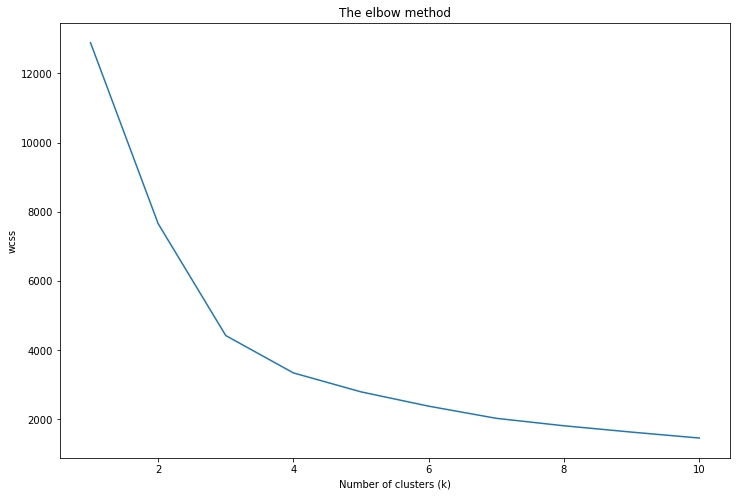

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init= 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize= [12, 8])
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.ylabel('wcss')
plt.xlabel('Number of clusters (k)');

### Silhouette analysis
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [32]:
from sklearn.metrics import silhouette_score

k_range = [2, 3, 4, 5, 6]
for k in k_range:
    #initiating kmeans
    kmeans = KMeans(n_clusters = k, init= 'k-means++')
    kmeans.fit(x_scalled)
    clustered_labels = kmeans.labels_
    
    #calculating silhouette score
    silhouette_avg = silhouette_score(x, clustered_labels)
    #printing the silhouette score for each k
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.543842560086245
For n_clusters=3, the silhouette score is 0.5096914125042423
For n_clusters=4, the silhouette score is 0.4824483859041716
For n_clusters=5, the silhouette score is 0.4694033425099702
For n_clusters=6, the silhouette score is 0.4190998757554369


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


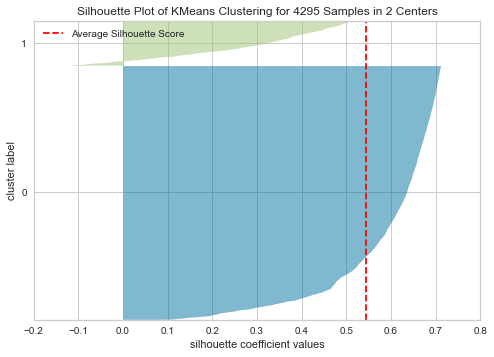

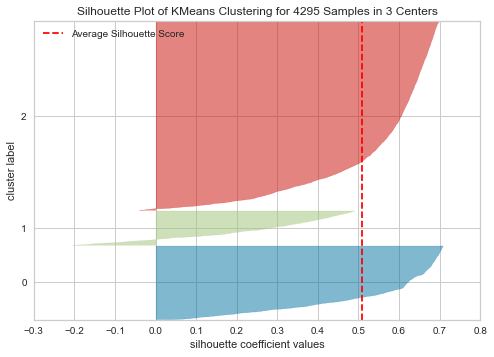

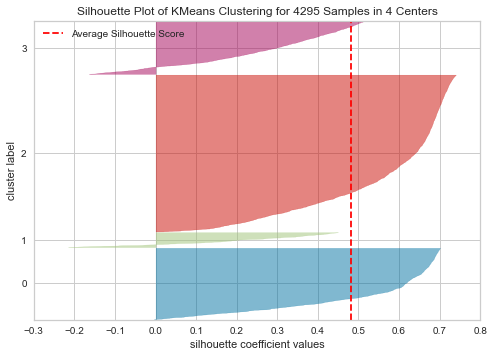

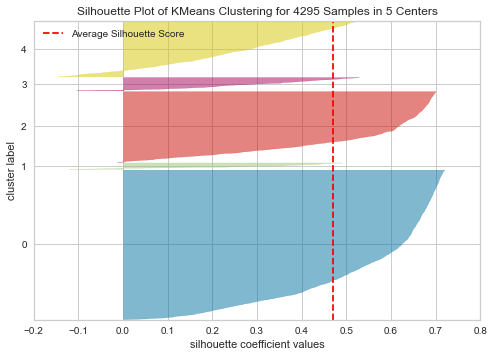

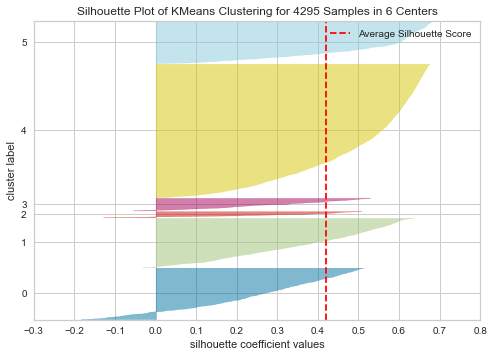

In [33]:
#visualizing silhouette scores 
from yellowbrick.cluster import SilhouetteVisualizer

k_range = [2, 3, 4, 5, 6]
for k in k_range:
    #initiating kmeans
    kmeans = KMeans(n_clusters = k, init= 'k-means++')
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(x)
    visualizer.show()

In [34]:
#kmeans model with k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(x_scalled)
kmeans.labels_

array([2, 1, 0, ..., 0, 1, 0])

In [35]:
clusters = list(kmeans.labels_)
new_df['cluster'] = clusters
new_df.head()

,CustomerID,recency,sales,frequency,cluster
0,12346.0,325,0.00,2,2
1,12347.0,1,4310.00,182,1
2,12348.0,74,1797.24,31,0
3,12349.0,18,1757.55,73,0
4,12350.0,309,334.40,17,2


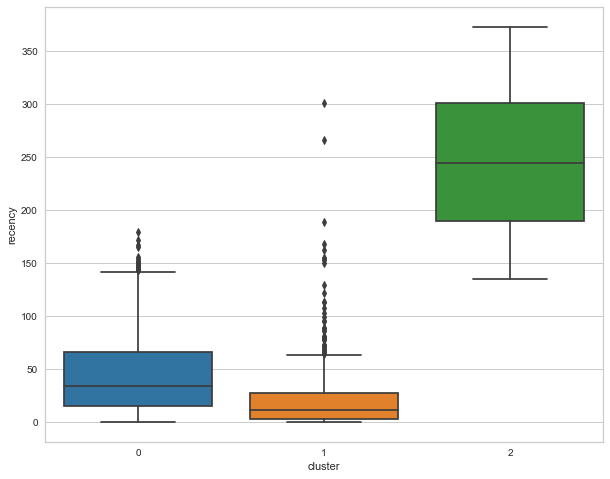

In [43]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'cluster', y = 'recency', palette="tab10");

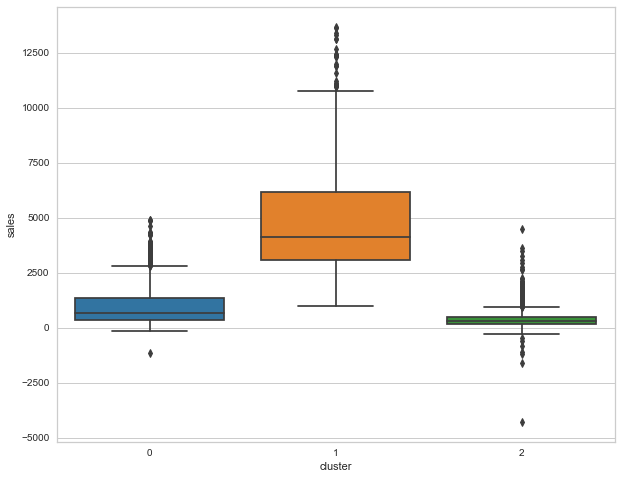

In [44]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'cluster', y = 'sales', palette="tab10");

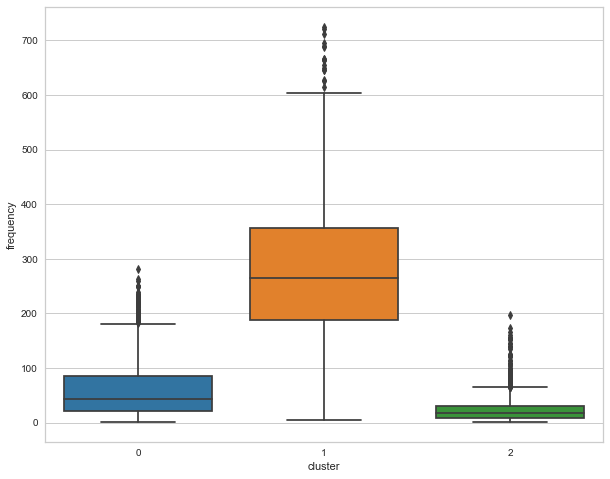

In [45]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'cluster', y = 'frequency', palette="tab10");

## 2 - Using Hierarchical clustering
Hierarchical clustering is an algorithm that groups similar objects into groups called clusters.
### How Hierarchical clustering algorithm works?
- Make each point a single- point cluster, which forms N clusters
- Take the two closest data points and make them on cluster, which forms N-1 clusters
- Take the two closest clusters and make them one cluster, which forms N-2 clusters
- Repeat the process untill there is certain number of cluster

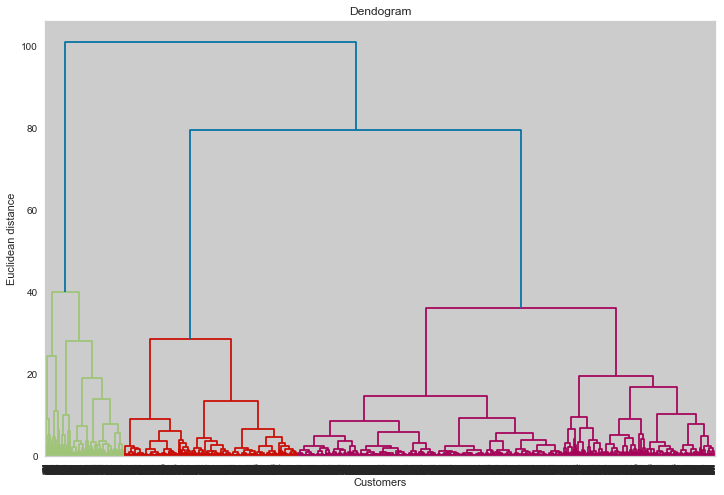

In [36]:
#using dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize = [12, 8])
dendogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [37]:
# Training the Hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
predicted_hc = hc.fit_predict(x)

In [46]:
new_df['hc_cluster'] = predicted_hc

In [47]:
new_df

,CustomerID,recency,sales,frequency,cluster,hc_cluster
0,12346.0,325,0.00,2,2,2
1,12347.0,1,4310.00,182,1,0
2,12348.0,74,1797.24,31,0,1
3,12349.0,18,1757.55,73,0,1
4,12350.0,309,334.40,17,2,2
...,...,...,...,...,...,...
4367,18280.0,277,180.60,10,2,2
4368,18281.0,180,80.82,7,2,2
4369,18282.0,7,176.60,13,0,1
4370,18283.0,3,2045.53,721,1,0


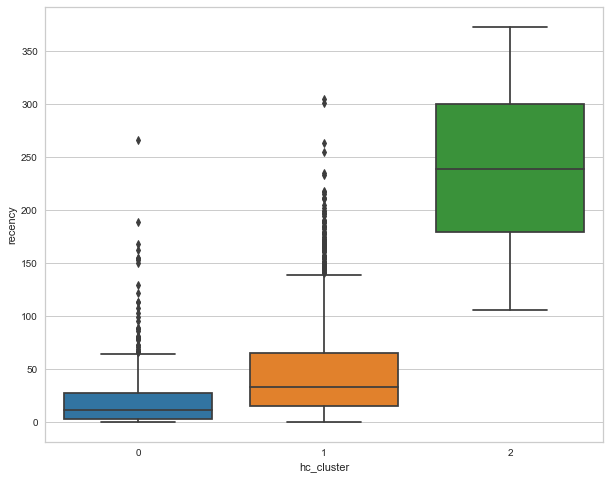

In [48]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'hc_cluster', y = 'recency', palette="tab10");

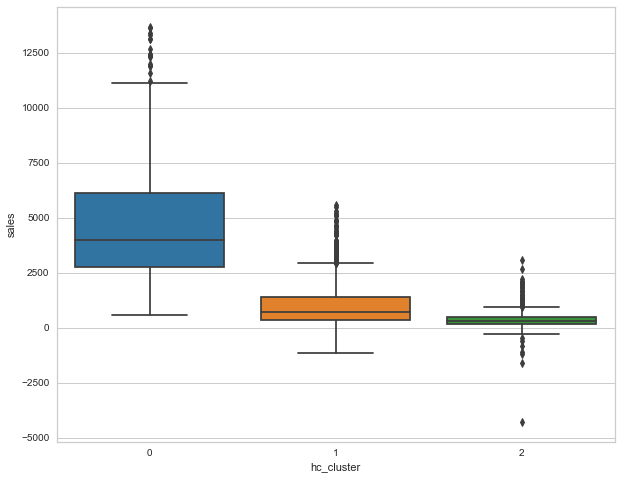

In [49]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'hc_cluster', y = 'sales', palette="tab10");

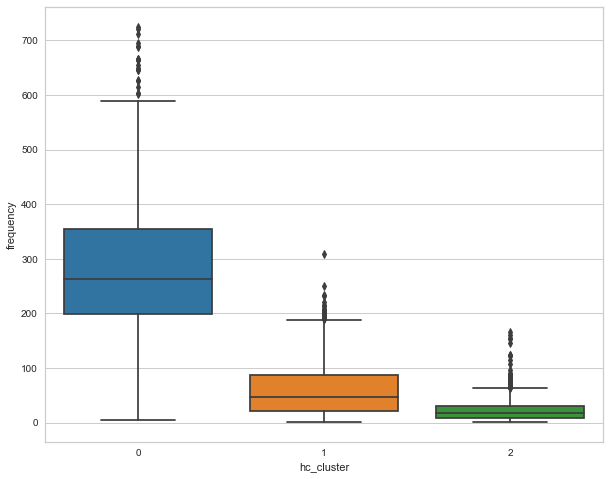

In [50]:
plt.figure(figsize = [10, 8])
sns.boxplot(data = new_df, x = 'hc_cluster', y = 'frequency', palette="tab10");

# Conclusion

### K-means clustering
  -  customers of cluster 2 have high recency, so we need to stay connected with them (offers ads) to make them frequent customers.
  - customers of group 1 are frequent buyers and they are the highest group in terms of sales, we need to adapt some loyality programs to maintain their loyality.
### Hierarchical clustering
  - customers of cluster 2 have high recency, so we need to stay connected with them (offers ads) to make them frequent customers.
  - customers of group 0 are frequent buyers and they are the highest group in terms of sales, we need to adapt some loyality programs to maintain their loyality.